# Final Notebook: Predicting Grocery Customer Behaviors and Market Basket Analysis. Exploratory Data Analysis and Modeling


In [103]:
# import the relevant libraries

import numpy as np
import scipy
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import plot_confusion_matrix, confusion_matrix,precision_score, recall_score,\
accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE, SMOTENC

import xgboost as xgb

import warnings
warnings.filterwarnings("ignore", category=Warning)

In [3]:
# Loading our data

aisles = pd.read_csv("Data/aisles.csv")
products = pd.read_csv("Data/products.csv")
departments = pd.read_csv("Data/departments.csv")
order_products_prior = pd.read_csv("Data/order_products__prior.csv")
order_products_train = pd.read_csv("Data/order_products__train.csv")
orders = pd.read_csv("Data/orders.csv")

## Exploring the dataframes

In [4]:
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
aisles.aisle.values.tolist()

['prepared soups salads',
 'specialty cheeses',
 'energy granola bars',
 'instant foods',
 'marinades meat preparation',
 'other',
 'packaged meat',
 'bakery desserts',
 'pasta sauce',
 'kitchen supplies',
 'cold flu allergy',
 'fresh pasta',
 'prepared meals',
 'tofu meat alternatives',
 'packaged seafood',
 'fresh herbs',
 'baking ingredients',
 'bulk dried fruits vegetables',
 'oils vinegars',
 'oral hygiene',
 'packaged cheese',
 'hair care',
 'popcorn jerky',
 'fresh fruits',
 'soap',
 'coffee',
 'beers coolers',
 'red wines',
 'honeys syrups nectars',
 'latino foods',
 'refrigerated',
 'packaged produce',
 'kosher foods',
 'frozen meat seafood',
 'poultry counter',
 'butter',
 'ice cream ice',
 'frozen meals',
 'seafood counter',
 'dog food care',
 'cat food care',
 'frozen vegan vegetarian',
 'buns rolls',
 'eye ear care',
 'candy chocolate',
 'mint gum',
 'vitamins supplements',
 'breakfast bars pastries',
 'packaged poultry',
 'fruit vegetable snacks',
 'preserved dips spreads

In [6]:
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
departments.department.values.tolist()

['frozen',
 'other',
 'bakery',
 'produce',
 'alcohol',
 'international',
 'beverages',
 'pets',
 'dry goods pasta',
 'bulk',
 'personal care',
 'meat seafood',
 'pantry',
 'breakfast',
 'canned goods',
 'dairy eggs',
 'household',
 'babies',
 'snacks',
 'deli',
 'missing']

In [8]:
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
for col in products:
    print(products[col].unique())

[    1     2     3 ... 49686 49687 49688]
['Chocolate Sandwich Cookies' 'All-Seasons Salt'
 'Robust Golden Unsweetened Oolong Tea' ... 'Artisan Baguette'
 'Smartblend Healthy Metabolism Dry Cat Food' 'Fresh Foaming Cleanser']
[ 61 104  94  38   5  11  98 116 120 115  31 119  74  56 103  35  79  63
  40  20  49  47   3  41 127 121  81 123 107 131 106  69 100  64  78  83
  58  66  87  14 105  22 134  23 111 128  50   9  96  92  89  88 130  26
  77  65  12  95  19   7   6  97   2 112  10  51  13  75  70  93  34  62
  21  29  45 118   4 108  37 109  91  24  67 132  25 129  46  16  52  17
  73 122  42  59 126  33   1   8  82 114 124 117  72 110  85  44  80 101
  84  30  27  90  48 133  53  28  68  43 125  57  15  55  36  54 102  60
  99  18  39  71 113  86  32  76]
[19 13  7  1 11 16 17 18 12  9  8 14 15  4 21  6 20  5  3  2 10]


In [10]:
products.product_name.values.tolist()

['Chocolate Sandwich Cookies',
 'All-Seasons Salt',
 'Robust Golden Unsweetened Oolong Tea',
 'Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce',
 'Green Chile Anytime Sauce',
 'Dry Nose Oil',
 'Pure Coconut Water With Orange',
 "Cut Russet Potatoes Steam N' Mash",
 'Light Strawberry Blueberry Yogurt',
 'Sparkling Orange Juice & Prickly Pear Beverage',
 'Peach Mango Juice',
 'Chocolate Fudge Layer Cake',
 'Saline Nasal Mist',
 'Fresh Scent Dishwasher Cleaner',
 'Overnight Diapers Size 6',
 'Mint Chocolate Flavored Syrup',
 'Rendered Duck Fat',
 'Pizza for One Suprema  Frozen Pizza',
 'Gluten Free Quinoa Three Cheese & Mushroom Blend',
 'Pomegranate Cranberry & Aloe Vera Enrich Drink',
 'Small & Medium Dental Dog Treats',
 'Fresh Breath Oral Rinse Mild Mint',
 'Organic Turkey Burgers',
 'Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants',
 'Salted Caramel Lean Protein & Fiber Bar',
 'Fancy Feast Trout Feast Flaked Wet Cat Food',
 'Complete Spring Water Foaming

In [11]:
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
# The orders df has features describing day of week (order_dow) and what time of day (order_hour_of_day). 
# Option to change dow's to the corresponding days.  

for col in orders:
    print(orders[col].unique())

[2539329 2398795  473747 ...  626363 2977660  272231]
[     1      2      3 ... 206207 206208 206209]
['prior' 'train' 'test']
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[2 3 4 1 5 0 6]
[ 8  7 12 15  9 14 16 11 10 19 18 17 13 20  0 21 22  5 23  4  6  1  2  3]
[nan 15. 21. 29. 28. 19. 20. 14.  0. 30. 10.  3.  8. 13. 27.  6.  9. 12.
  7. 17. 11. 22.  4.  5.  2. 23. 26. 25. 16.  1. 18. 24.]


In [13]:
# Renaming the number of day of week to the name of day

orders["order_dow"] = orders["order_dow"].apply(lambda x:"Sunday" if x==0 else x)
orders["order_dow"] = orders["order_dow"].apply(lambda x:"Monday" if x==1 else x)
orders["order_dow"] = orders["order_dow"].apply(lambda x:"Tuesday" if x==2 else x)
orders["order_dow"] = orders["order_dow"].apply(lambda x:"Wednesday" if x==3 else x)
orders["order_dow"] = orders["order_dow"].apply(lambda x:"Thursday" if x==4 else x)
orders["order_dow"] = orders["order_dow"].apply(lambda x:"Friday" if x==5 else x)
orders["order_dow"] = orders["order_dow"].apply(lambda x:"Saturday" if x==6 else x)

In [14]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,Tuesday,8,NaN
1,2398795,1,prior,2,Wednesday,7,15.0
2,473747,1,prior,3,Wednesday,12,21.0
3,2254736,1,prior,4,Thursday,7,29.0
4,431534,1,prior,5,Thursday,15,28.0


In [15]:
print(order_products_prior.shape)
order_products_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


- order products prior data set gives us the insights on the orders that are ordered prior to users most recent order. 

In [16]:
for col in order_products_prior:
    print(order_products_prior[col].unique())

[      2       3       4 ... 3421081 3421082 3421083]
[33120 28985  9327 ... 33097 38977 23624]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145]
[1 0]


In [17]:
print(order_products_train.shape)
order_products_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [18]:
for col in order_products_train:
    print(order_products_train[col].unique())

[      1      36      38 ... 3421058 3421063 3421070]
[49302 11109 10246 ...  9491 16380 38900]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80]
[1 0]


In [19]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [20]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [21]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               object 
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 182.7+ MB


In [23]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [24]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


### Dataframe Overview: 
- orders dataset: order_id: order identifier, user_id: customer identifier, eval_set: which evaluation set this order belongs in (see train and prior dataset described below), order_number: the order sequence number for this user (1 = first, n = nth), order_dow: the day of the week the order was placed on, order_hour_of_day: the hour of the day the order was placed on, days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1)
- products dataset: product_id: product identifier, product_name: name of the product, aisle_id: foreign key, department_id: foreign key
- aisles dataset: aisle_id: aisle identifier, aisle: the name of the aisle
- departments dataset: department_id: department identifier, department: the name of the department
- order_products_prior and train datasets: order_id: foreign key, product_id: foreign key, add_to_cart_order: order in which each product was added to cart, reordered: 1 if this product has been ordered by this user in the past, 0 otherwise, “prior”: orders prior to that users most recent order, “train”: training data supplied to participants of the competition, “test”: test data reserved for machine learning competition

## Checking Missing Values

In [25]:
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

- We have over 200,000 missing values on the day since the last order. However, as it is explained in the description of the variables, NA represents the order_number 1 of that particular customer.

In [26]:
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [27]:
departments.isna().sum()

department_id    0
department       0
dtype: int64

In [28]:
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [29]:
order_products_prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [30]:
order_products_train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

## Analyzing the Dataframes

 - In this section, we will be analyzing product and user trends, as well as engineering additional features for modeling to give important insights for our stakeholder about customer order behavior. 


### Products Dataframe

In [31]:
# We see that their are 49,688 unique, different products and
# that there 21 different department_id's and 134 different aisle_id's 

print(products.shape)
print(products.department_id.nunique())
print(products.aisle_id.nunique())

(49688, 4)
21
134


- It would be useful to merge the products dataframe with the aisle and department dataframe for gaining insight on how many products are in a specific department and aisle. Merge using 'aisle_id' and 'department_id'

In [61]:
# Merging  products + aisles + department into one df 

products_details = products.merge(aisles, how='left', left_on = 'aisle_id', right_on = 'aisle_id')
products_details = products_details.merge(departments, how='left', left_on='department_id', right_on='department_id')
products_details.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


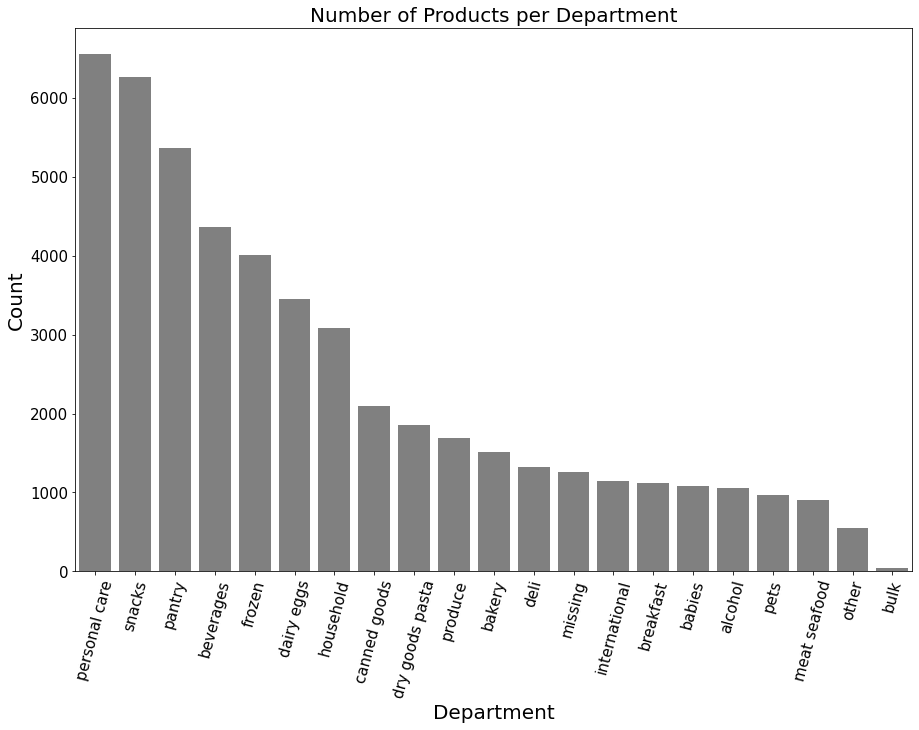

In [33]:
plt.figure(figsize = (15,10))
sns.countplot(x='department', data= products_details, order = products_details.department.value_counts().index,
              color = "grey")
plt.title('Number of Products per Department', fontsize = 20)
plt.xticks(rotation=75, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Department', fontsize = 20)
plt.savefig('Images/products_by_department.png');

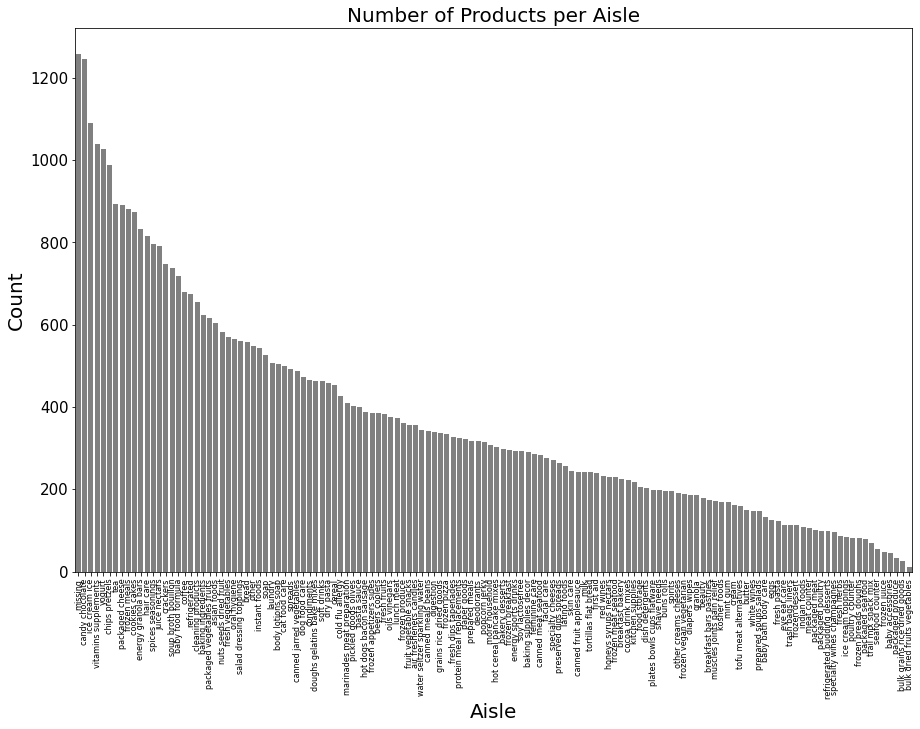

In [34]:
plt.figure(figsize = (15,10))
sns.countplot(x='aisle', data= products_details, order = products_details.aisle.value_counts().index, color = 'grey')
plt.title('Number of Products per Aisle', fontsize = 20)
plt.xticks(rotation=90, fontsize = 8)
plt.yticks(fontsize = 15)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Aisle', fontsize = 20)
plt.savefig('Images/products_by_aisle.png');

# There is a "missing" department between the deli and international on the visual above. 

- The first aisle, 'missing', has the most counts, and I see there is a 'missing' value for department above as well

In [35]:
# Aisle 100 and Department 21 has 1258 products "missing"
# Choosing to keep rows of "missing" department and aisle rows
# Making a mental note that aisle_id 100 is "missing" as well as department_id 21 is "missing"
products_details[products_details['aisle']=='missing']

,product_id,product_name,aisle_id,department_id,aisle,department
37,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
71,72,Organic Honeycrisp Apples,100,21,missing,missing
109,110,Uncured Turkey Bologna,100,21,missing,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21,missing,missing
49574,49575,Chocolate Vanilla Malt Custard,100,21,missing,missing
49640,49641,"8\"" Pecan Pie",100,21,missing,missing
49663,49664,Lemon Cayenne Drinking Vinegar,100,21,missing,missing


In [36]:
# This shows that a specific aisle_id corresponds to a specfic department_id. 
# This example of aisle_id of 15 with the "meat seafood" department
products_details[products_details['aisle_id']==15]

,product_id,product_name,aisle_id,department_id,aisle,department
560,561,Smoke Roasted Wild Sockeye Asian Sesame Salmon,15,12,packaged seafood,meat seafood
664,665,Imitation Crabmeat,15,12,packaged seafood,meat seafood
940,941,Smoked Atlantic Nova Salmon,15,12,packaged seafood,meat seafood
2820,2821,Tuna Steaks,15,12,packaged seafood,meat seafood
3160,3161,Flake Style Imitation Crab,15,12,packaged seafood,meat seafood
...,...,...,...,...,...,...
47379,47380,New York Style Nova Lox,15,12,packaged seafood,meat seafood
47877,47878,Imitation Crab Legs,15,12,packaged seafood,meat seafood
48359,48360,Raw Shrimp 41-50,15,12,packaged seafood,meat seafood
48828,48829,Smoke Roasted Wild Sockeye Salmon Apple Brown ...,15,12,packaged seafood,meat seafood


In [37]:
# Many relationship between department and aisle
# The example of the produce department (id=4) shows that it can be found in a variety of different aisles. 
# fresh(id=83) or packaged(id=123) aisles
products_details[products_details['department']=='produce']

,product_id,product_name,aisle_id,department_id,aisle,department
30,31,White Pearl Onions,123,4,packaged vegetables fruits,produce
42,43,Organic Clementines,123,4,packaged vegetables fruits,produce
44,45,European Cucumber,83,4,fresh vegetables,produce
65,66,European Style Spring Mix,123,4,packaged vegetables fruits,produce
88,89,Yogurt Fruit Dip Sliced Apples,123,4,packaged vegetables fruits,produce
...,...,...,...,...,...,...
49577,49578,Black Garlic Bulbs,123,4,packaged vegetables fruits,produce
49618,49619,Opo Squash,83,4,fresh vegetables,produce
49634,49635,"Baby Food Blueberry, Parsnip & Buckwheat Stage 2",83,4,fresh vegetables,produce
49656,49657,Cabernet Tomatoes,83,4,fresh vegetables,produce


### Orders Dataframe - Exploration and Analysis

In [38]:
# We see that their are 3,421,083 unique, different orders, starting from order_id 1 to 3,421,083
print(orders.shape)
print(orders.order_id.min())
print(orders.order_id.max())

(3421083, 7)
1
3421083


In [39]:
# Inner join orders and orders_prior to isolate only prior orders

pd.set_option('display.float_format', lambda x: '%.f' % x)

orders_products = orders.merge(order_products_prior,on='order_id',how='inner')
orders_products.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,Tuesday,8,nan,196,1,0
1,2539329,1,prior,1,Tuesday,8,nan,14084,2,0
2,2539329,1,prior,1,Tuesday,8,nan,12427,3,0
3,2539329,1,prior,1,Tuesday,8,nan,26088,4,0
4,2539329,1,prior,1,Tuesday,8,nan,26405,5,0


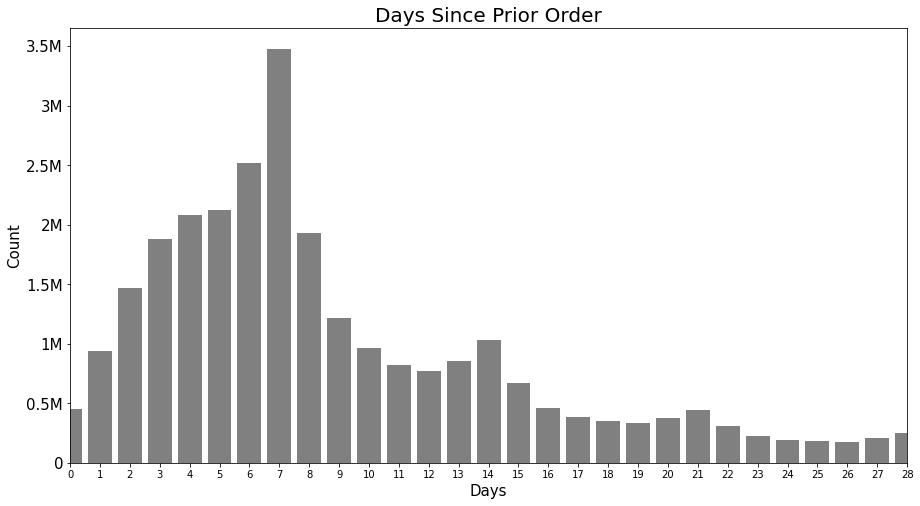

In [40]:
plt.figure(figsize = (15,8))
sns.countplot(x='days_since_prior_order', data= orders_products, color = 'grey')
plt.title('Days Since Prior Order', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.yticks([0,500000,1000000,1500000,2000000,2500000,3000000,3500000],
           ["0","0.5M", "1M", "1.5M", "2M", "2.5M", "3M", "3.5M"],fontsize = 15)
plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.xlim(0,28)

#plt.ticklabel_format(style='plain', axis='y')

plt.savefig('Images/days_since_order.png');

- We see that days 1-7 have a positive trend and most common days since prior order and we can also see at days 7, 14, 21, 28, there is a slight peak and this represents the customers that prefers ordering weekly, biweekly, or etc. 

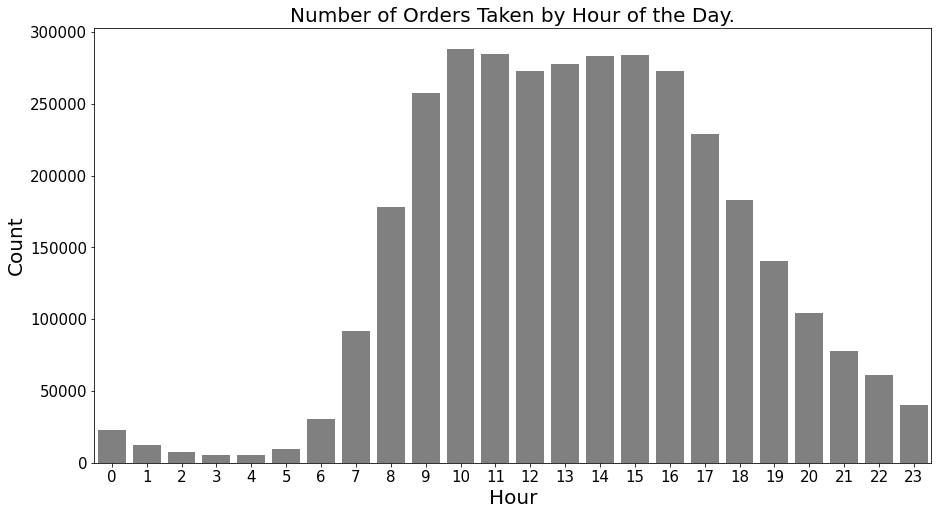

In [41]:
plt.figure(figsize = (15,8))
sns.countplot(x='order_hour_of_day', data= orders, color = 'grey')
plt.title('Number of Orders Taken by Hour of the Day.', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Hour', fontsize = 20)
plt.savefig('Images/orders_by_hour.png');
# The peak hours appear to be 9am - 4pm

- The peak hours for the online grocery orders is around 9am - 4pm. Great timeframe to utilize for ads, coupons, news to target customers. 

In [42]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,Tuesday,8,nan
1,2398795,1,prior,2,Wednesday,7,15
2,473747,1,prior,3,Wednesday,12,21
3,2254736,1,prior,4,Thursday,7,29
4,431534,1,prior,5,Thursday,15,28


In [43]:
orders.order_dow.sort_values(ascending = False)

2731519    Wednesday
1765408    Wednesday
518650     Wednesday
1446674    Wednesday
1544681    Wednesday
             ...    
2361179       Friday
2361184       Friday
2361192       Friday
662678        Friday
1710541       Friday
Name: order_dow, Length: 3421083, dtype: object

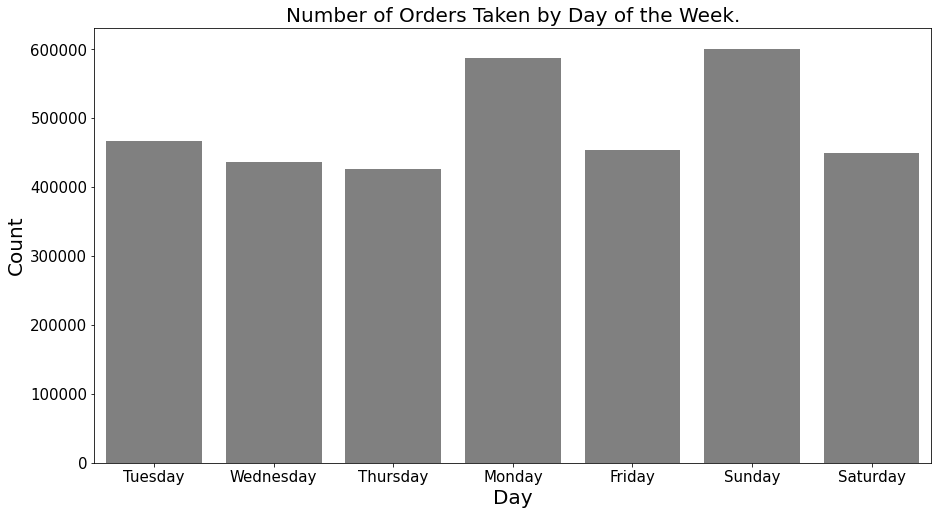

In [44]:
plt.figure(figsize = (15,8))

sns.countplot(x='order_dow', data= orders, color = "grey")
plt.title('Number of Orders Taken by Day of the Week.', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.savefig('Images/orders_by_dow.png');
# Sunday and Monday are the busiest days

In [45]:
# The orders dataframe appears to filter with user_id first, and then it organized with order_number. 
# We can see some NaN values in days_since_prior_order
# Most recent order_number per user_id is in the train eval_set, others are in prior

orders.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,Tuesday,8,nan
1,2398795,1,prior,2,Wednesday,7,15
2,473747,1,prior,3,Wednesday,12,21
3,2254736,1,prior,4,Thursday,7,29
4,431534,1,prior,5,Thursday,15,28
5,3367565,1,prior,6,Tuesday,7,19
6,550135,1,prior,7,Monday,9,20
7,3108588,1,prior,8,Monday,14,14
8,2295261,1,prior,9,Monday,16,0
9,2550362,1,prior,10,Thursday,8,30


In [46]:
# The order_id's begin at the value 1

orders.order_id.min()

1

In [47]:
# 131,209 orders in our train set

orders_train = orders[orders['eval_set']=='train']

orders_train

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,Thursday,8,14
25,1492625,2,train,15,Monday,11,30
49,2196797,5,train,5,Sunday,11,6
74,525192,7,train,21,Tuesday,11,6
78,880375,8,train,4,Monday,14,10
...,...,...,...,...,...,...,...
3420838,2585586,206199,train,20,Tuesday,16,30
3420862,943915,206200,train,24,Saturday,19,6
3420924,2371631,206203,train,6,Thursday,19,30
3420933,1716008,206205,train,4,Monday,16,10


In [48]:
# 75,000 orders in our test set. 
# Train Test split ratio about 64:36

orders_test = orders[orders['eval_set']=='test'] 
orders_test
# I do not know what products were ordered in the test sets. 
# market basket analysis will help predict

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,Friday,15,11
44,329954,4,test,6,Wednesday,12,30
53,1528013,6,test,4,Wednesday,16,22
96,1376945,11,test,8,Saturday,11,8
102,1356845,12,test,6,Monday,20,30
...,...,...,...,...,...,...,...
3420918,2728930,206202,test,23,Tuesday,17,6
3420929,350108,206204,test,5,Thursday,14,14
3421001,1043943,206206,test,68,Sunday,20,0
3421018,2821651,206207,test,17,Tuesday,13,14


###  order_product Prior and Train Dataframes - Exploration and Analysis

In [49]:
# 1,384,617 order/products
# begins with order number 1
# 131,209 unique orders

print(order_products_train.shape) 
print(order_products_train.order_id.min())
print(order_products_train.order_id.max())
print(order_products_train.order_id.nunique())

(1384617, 4)
1
3421070
131209


In [50]:
# 32,434,489 order/products
# begins with order number 2
# 3,214,874 unique orders

print(order_products_prior.shape)
print(order_products_prior.order_id.min())
print(order_products_prior.order_id.max())
print(order_products_prior.order_id.nunique())

(32434489, 4)
2
3421083
3214874


In [51]:
# Example of a specific order_id
orders[orders.order_id == 2]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3355525,2,202279,prior,3,Friday,9,8


In [52]:
order_products_prior[order_products_prior.order_id == 2]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0


In [53]:
# NOTE: Need to be sure not to think order_id is chronological, user_id 202279's third order was actually 
# order number 2.  

orders[orders.user_id == 202279]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3355523,2894949,202279,prior,1,Friday,9,nan
3355524,1500071,202279,prior,2,Thursday,13,20
3355525,2,202279,prior,3,Friday,9,8
3355526,3058248,202279,prior,4,Wednesday,14,30
3355527,2808715,202279,prior,5,Friday,13,9
3355528,132412,202279,prior,6,Friday,9,30
3355529,2382766,202279,prior,7,Monday,14,24
3355530,104690,202279,prior,8,Saturday,10,30
3355531,1050357,202279,train,9,Monday,14,30


In [54]:
order_products_train[order_products_train.order_id == 1050357]

,order_id,product_id,add_to_cart_order,reordered
429686,1050357,33120,1,1
429687,1050357,1003,2,1
429688,1050357,21543,3,1
429689,1050357,20995,4,1
429690,1050357,46064,5,0
429691,1050357,20168,6,0
429692,1050357,42824,7,1
429693,1050357,4461,8,1
429694,1050357,45002,9,1
429695,1050357,8693,10,0


In [55]:
# This user (user_id = 202279) has ordered 9 times. 
len(orders[orders.user_id == 202279])

9

In [56]:
# Day 5 (Friday) is the most common day of week this customer orders groceries
# about 22.6 days is the average between orders
# 11:40AM is the average time of day the customer places its order. 

print(orders[orders.user_id == 202279].order_dow.mode())
print(orders[orders.user_id == 202279].days_since_prior_order.mean())
print(orders[orders.user_id == 202279].order_hour_of_day.mean())

0    Friday
dtype: object
22.625
11.666666666666666


In [57]:
# These are the corresponding order_id's for the user_id 202279.

list(orders[orders.user_id == 202279]['order_id'].values)

[2894949, 1500071, 2, 3058248, 2808715, 132412, 2382766, 104690, 1050357]

In [58]:
# These are the corresponding product_id's to the repsective order_id's for user_id 202279.

order_products_prior[order_products_prior['order_id'].isin
                     (list(orders[orders.user_id == 202279]['order_id'].values))]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
28997578,3058248,27531,4,0
28997579,3058248,2944,5,0
28997580,3058248,38226,6,0
28997581,3058248,35106,7,0


### Merging the order_products dataframes together

In [62]:
# orders_products will be my master dataframe that we made by merging the other dataframes

orders_products = orders_products.merge(products_details,how='left', left_on = 'product_id',right_on = 'product_id')
orders_products.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,Tuesday,8,nan,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,Tuesday,8,nan,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
2,2539329,1,prior,1,Tuesday,8,nan,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks
3,2539329,1,prior,1,Tuesday,8,nan,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
4,2539329,1,prior,1,Tuesday,8,nan,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household
5,2398795,1,prior,2,Wednesday,7,15,196,1,1,Soda,77,7,soft drinks,beverages
6,2398795,1,prior,2,Wednesday,7,15,10258,2,0,Pistachios,117,19,nuts seeds dried fruit,snacks
7,2398795,1,prior,2,Wednesday,7,15,12427,3,1,Original Beef Jerky,23,19,popcorn jerky,snacks
8,2398795,1,prior,2,Wednesday,7,15,13176,4,0,Bag of Organic Bananas,24,4,fresh fruits,produce
9,2398795,1,prior,2,Wednesday,7,15,26088,5,1,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks


In [63]:
orders_products.describe()

,order_id,user_id,order_number,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
count,32434489,32434489,32434489,32434489,30356421,32434489,32434489,32434489,32434489,32434489
mean,1710749,102937,17,13,11,25576,8,1,71,10
std,987301,59466,18,4,9,14097,7,0,38,6
min,2,1,1,0,0,1,1,0,1,1
25%,855943,51421,5,10,5,13530,3,0,31,4
50%,1711048,102611,11,13,8,25256,6,1,83,9
75%,2565514,154391,24,16,15,37935,11,1,107,16
max,3421083,206209,99,23,30,49688,145,1,134,21


In [64]:
products_per_order = orders_products.groupby('order_id').count()

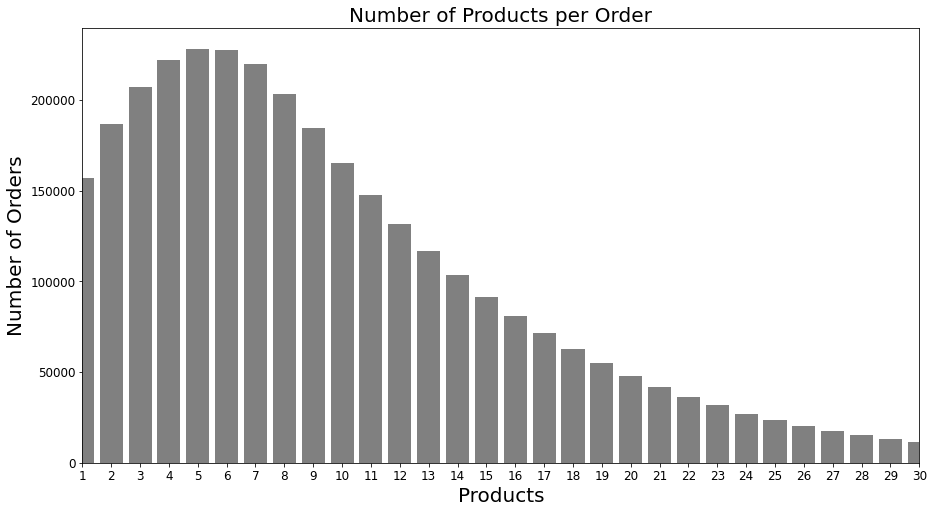

In [65]:
# 5 is the most common number of products per order

plt.figure(figsize = (15,8))
sns.countplot(x='product_id', data = products_per_order, color = 'grey')
plt.title('Number of Products per Order', fontsize = 20)
plt.xlim(0,29)
plt.xticks(rotation=0, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Number of Orders', fontsize = 20)
plt.xlabel('Products', fontsize = 20)
plt.savefig('Images/product_count_by_order.png');

In [66]:
orders_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               object 
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
 14  department              object 
dtypes: float64(1), int64(9), object(5)
memory usage: 3.9+ GB


In [67]:
orders_products.isna().sum()

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64

In [68]:
# Reorder vs not reorder distribution

orders_products['reordered'].value_counts()

1    19126536
0    13307953
Name: reordered, dtype: int64

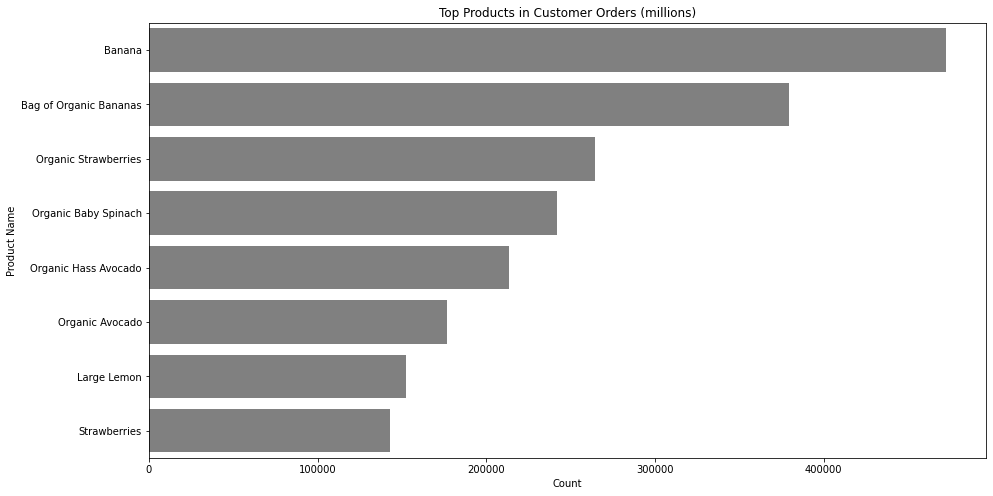

In [75]:
# What products are most commonly included in customers baskets?

plt.figure(figsize = (15,8))


x = orders_products['product_name'].value_counts().head(8)
y = orders_products['product_name'].value_counts().head(8).index


sns.barplot(x=x, y=y,orient='h',color ='grey')
plt.ylabel("Product Name")
plt.xlabel("Count")
plt.title('Top Products in Customer Orders (millions)')
plt.savefig('Images/Top_products_ordered.png');

- Produce products are the most ordered products: Banana's and avocado's are represented twice with both organic and non organic versions

In [ ]:
#plt.figure(figsize = (15,8))
#sns.countplot(x='product_id', data = products_per_order, color = 'grey')
#plt.title('Number of Products per Order', fontsize = 20)
#plt.xlim(0,29)
#plt.xticks(rotation=0, fontsize = 12)
#plt.yticks(fontsize = 12)
#plt.ylabel('Number of Orders', fontsize = 20)
#plt.xlabel('Products', fontsize = 20)
#plt.savefig('Images/product_count_by_order.png');


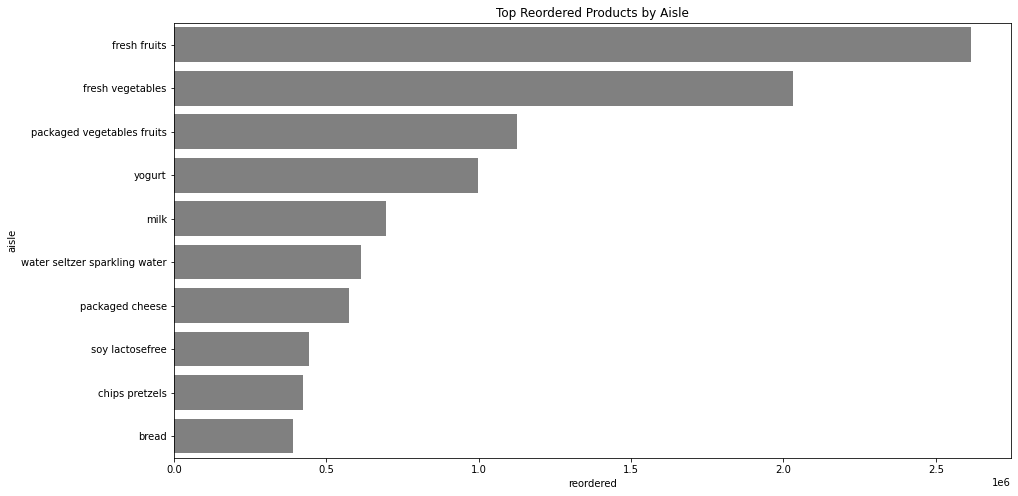

In [77]:
# Visualizing reorders by product by aisle 

plt.figure(figsize = (15,8))


x = orders_products.groupby('aisle')['reordered'].sum().sort_values(ascending=False).head(10).index
y = orders_products.groupby('aisle')['reordered'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=y, y=x,orient='h',color ='grey')
plt.title('Top Reordered Products by Aisle')
plt.savefig('Images/Top_Reordered_Products_Aisle.png');


- Similar observations to top products in customer orders, no new re-order trends. 

# Feature Engineering

- Specifically, features that describe customer behavior in regards to ordering behavior and product preferences

### User Features

In [83]:
# total orders per customer

orders_products['total_customer_orders'] = orders_products.groupby('user_id')['order_number'].transform('max')

In [84]:
# total reorders per customer 

x = orders_products['reordered'].groupby(orders_products['user_id']).transform('sum')
orders_products['customer_reorders'] = x 

In [85]:
# total products ordered by customer 

x2 = orders_products['order_id'].groupby(orders_products['user_id']).transform('count')
orders_products['total_customer_prod_orders'] = x2

In [90]:
# re-order ratio by customer 

orders_products['customer_reorder_ratio'] = orders_products['customer_reorders']/orders_products['total_customer_prod_orders']

In [91]:
# average basket size by customer 

orders_products['customer_avg_bskt'] = orders_products['total_customer_prod_orders']/orders_products['total_customer_orders']

### Product Features

In [92]:
# Frequency of product being ordered

orders_products['product_order_freq'] = orders_products.groupby(['user_id','product_id']).cumcount() + 1

In [93]:
# total orders by product 

x3 = orders_products.groupby('product_id')['product_id'].transform('count')
orders_products['product_total_orders'] = x3

In [94]:
# first orders by product

orders_products['first_orders'] = (orders_products.assign(first = orders_products['product_order_freq']
                          .where(orders_products['product_order_freq'] == 1))
                          .groupby('product_id')['first']
                          .transform('sum'))

In [95]:
# second orders by product

orders_products['second_orders'] = (orders_products.assign(second = orders_products['product_order_freq']
                          .where(orders_products['product_order_freq'] == 2))
                          .groupby('product_id')['second']
                          .transform('sum'))

In [96]:
# total reorders by product 

x4 = orders_products.groupby('product_id')['reordered'].transform('sum')

orders_products['product_total_reorders'] = x4

In [97]:
# product reorder ratio

orders_products['product_reorder_prob'] = orders_products['second_orders']/orders_products['first_orders']
orders_products['product_reorder_times'] = 1 + (orders_products['product_total_reorders']/orders_products['first_orders'])
orders_products['product_reorder_ratio'] = orders_products['product_total_reorders']/orders_products['product_total_orders']
orders_products.drop(columns=['first_orders','second_orders'],inplace=True)


In [100]:
orders_products.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,customer_reorders,total_customer_prod_orders,customer_reorder_ratio,customer_avg_bskt,product_order_freq,product_total_orders,product_total_reorders,product_reorder_prob,product_reorder_times,product_reorder_ratio
0,2539329,1,prior,1,Tuesday,8,nan,196,1,0,...,41,59,1,6,1,35791,27791,1,4,1
1,2539329,1,prior,1,Tuesday,8,nan,14084,2,0,...,41,59,1,6,1,15935,12923,1,5,1
2,2539329,1,prior,1,Tuesday,8,nan,12427,3,0,...,41,59,1,6,1,6476,4797,1,4,1
3,2539329,1,prior,1,Tuesday,8,nan,26088,4,0,...,41,59,1,6,1,2523,1360,1,2,1
4,2539329,1,prior,1,Tuesday,8,nan,26405,5,0,...,41,59,1,6,1,1214,536,1,2,0
5,2398795,1,prior,2,Wednesday,7,15,196,1,1,...,41,59,1,6,2,35791,27791,1,4,1
6,2398795,1,prior,2,Wednesday,7,15,10258,2,0,...,41,59,1,6,1,1946,1389,1,3,1
7,2398795,1,prior,2,Wednesday,7,15,12427,3,1,...,41,59,1,6,2,6476,4797,1,4,1
8,2398795,1,prior,2,Wednesday,7,15,13176,4,0,...,41,59,1,6,1,379450,315913,1,6,1
9,2398795,1,prior,2,Wednesday,7,15,26088,5,1,...,41,59,1,6,2,2523,1360,1,2,1


In [98]:
orders_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 31 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   order_id                    int64  
 1   user_id                     int64  
 2   eval_set                    object 
 3   order_number                int64  
 4   order_dow                   object 
 5   order_hour_of_day           int64  
 6   days_since_prior_order      float64
 7   product_id                  int64  
 8   add_to_cart_order           int64  
 9   reordered                   int64  
 10  product_name                object 
 11  aisle_id                    int64  
 12  department_id               int64  
 13  aisle                       object 
 14  department                  object 
 15  total_user_orders           int64  
 16  user_reorders               int64  
 17  total_user_prod_orders      int64  
 18  user_reorder_ratio          float64
 19  user_avg_bskt      

# Modeling
- Class Imbalance will be addressed with SMOTE
- Our baseline model will be a Dummy Classifier
- First Simple Model will be a Logistic Regression
- Our best models that will be iterated includes DecisionTree, RandomForest. (the dataset is too large to effectively use KNeighbors)
- A XGBoost model will be utilized to understand Feature Importance
- Grid Search will be utilized to optimize the hyperparameters

In [104]:
# Dropping unnecessary 'object' columns  

reorders_model = orders_products.select_dtypes(exclude=['object'])

In [105]:
# Fill null values from prior order days with 0 

reorders_model.fillna(0,inplace=True)

In [106]:
# Features and target

X = reorders_model.drop(columns='reordered')
y = reorders_model['reordered']

In [107]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.75,random_state=42)

### Baseline Model: Dummy Classifier

In [113]:
dummy = DummyClassifier(random_state = 42)
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])